# Project on Machine Learning
## Overview
The aim of this project is to use data from Monte Carlo simulations of a familiar system from Statistical Mechanics, namely the Ising Model. We will use a simple model without any external magnetic field. The energy expectation value is expressed as
    $$E=-J\sum\limits^N_{\{kl\}}s_ks_l$$
The $s_k$ and $s_l$ indicate a spin. The spins are represented in a spin-lattice with $s_k=\pm 1$ and $N$ being the total number of spins. $J$ is a coupling constant representing the strength of the interaction between neighbouring pairs of spins. The $<kl>$ notation indicate sum over the nearest neighbours.

The data used and the methods explored follow closesly article [Metha et al, arXiv 1803.08823](https://arxiv.org/pdf/1803.08823.pdf) accompanied by a [Jupyter notebook](https://physics.bu.edu/~pankajm/MLnotebooks.html). The methods explored here is logistic regression, random forest algorithm and deep neural networks.

The interresting physical properties to be extracted is states above, below and around a critical temperature $T_c$. When the system is in a temperature lower than this the system is in a so-called ferromagnetic phase. When close to the critical point, the magnetization becomes smaller, while the net magnetization is zero when the temperature is above $T_c$.

## Theory
We will first present the theory for the methods mentioned.

### Linear Regression
Linear regression model is a model for fitting data-points to a linear functional form.

Given a data set 
    $$\{y_i, \boldsymbol{x}_i\}_{i=1}^n,\; i=1,\dots,n$$ 
of $n$ points with $\boldsymbol{X}$ being the $n\times m$ matrix representing the regressors. Assuming the relationship between the regressors and $y_i$ is linear, the model is
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$
with 
    $$
    \boldsymbol{y} =
        \begin{pmatrix}
            y_1 \\
            \vdots \\
            y_n
        \end{pmatrix},
    $$
    $$
    \boldsymbol{X} =
        \begin{pmatrix}
            1 & f_1\left(x_{11}\right) & \dots & f_1\left(x_{1m}\right) \\
            \vdots & \vdots & \ddots & \vdots \\
            1 & f_n\left(x_{n1}\right) & \dots & f_n\left(x_{nm}\right)
        \end{pmatrix}
    $$
and
    $$
    \boldsymbol{\beta} = 
        \begin{pmatrix}
            \beta_0 \\
            \vdots \\
            \beta_m
        \end{pmatrix}.
    $$
The vector $\boldsymbol{\varepsilon}$ is an estimate for the noise in the system(i.e variance in the Monte Carlo simulation) and $f_i$ is a pre-defined function. This can for instance be a polynomial function
    $$f_i(x) = x^i,$$
or a polynomial in sine
    $$f_i(x) = \sin(ix),$$
or any other suitable choice.

The method of linear regression is simply to minimize the $L_2$-norm with respect to parameters $\boldsymbol{\beta}$, giving the following scheme
    $$\underset{\boldsymbol{\beta}}{\text{min}}{\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2,$$
with solution
    $$\boldsymbol{\beta}_{\text{LS}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}{\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2.$$
Some differentiation yields in the following solution
    $$\boldsymbol{\beta}_{\text{LS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.$$
This optimization is known as the least-squares scheme. The $L_2$-norm is also known as the mean-squared error is the cost function in the least-squares scheme. For clarity, the cost function with the $L_2$ norm is
    $$C(\boldsymbol{X}) = \left|\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}\right|^2.$$

#### Ridge and Lasso Regression
While the linear regression model is rigorous and simple, it does have a tendency to overfit. In order to somewhat avoid this problem so-called regularization technicues have been developed. Two of these are Ridge and Lasso Regression.

##### Ridge Regression
With Ridge regression one performs an L2 regularization by adding an additional term equal to the square of the magnitude of the coefficients. This effectively ends up with performing the original linear regression, but with an added term. The equation is as follows
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \alpha\sum_{i=1}^m\beta^2_i,$$
with the scheme
    $$\boldsymbol{\beta}_{\text{Ridge}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}\left({\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}^2\right).$$
The cost is the function
    $$C(\boldsymbol{X}) = {\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}^2.$$
The factor $\alpha$ is just a scaling. This scheme is the same optimization problem as with the least-squares approach, but with a constraint $|\boldsymbol{\beta}|^2\leq t$ for some $t\geq 0$. We solve this again by differentiation with respect to $\boldsymbol{\beta}$ giving
    $$\boldsymbol{\beta}_{\text{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X} + \alpha \boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

##### Lasso Regression
The Lasso regression scheme performs an L1 regularization by adding only the absolute value of the magnitude of coefficients. The equation is
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \alpha\sum_{i=1}^m{\big|}\beta_i{\big|},$$
with $\alpha$ defined as before. The scheme is simply 
    $$\boldsymbol{\beta}_{\text{Lasso}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}\left({\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}\right).$$
The cost is
    $$C(\boldsymbol{X}) = {\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}.$$
As with the Ridge scheme this is also an optimization similar to least-squares with a constraint. The constraint in this case is $|\boldsymbol{\beta}|\leq t$ for some $t\geq 0$.

We cannot simply take the derivative in the Lasso scheme since the added regulizer is not everywhere differentiable, however since it is a convex problem the "subgradient optimally condition" can be invoked. Assuming $\boldsymbol{X}$ is orthogonal the solution is
    $$\beta^{\text{Lasso}}_j = \text{sign}\left(\beta^{\text{LS}}_j\right)\left({\big|}\beta^{\text{LS}}_j{\big|} - \alpha\right)_+$$

### Logistic Regression
As the title suggests, Logistic regression fits the data to a logistic function. A sigmoid function of the following form 
    $$f(x) = \frac{1}{1 + \exp(-\boldsymbol{x}^T\boldsymbol{w})}$$.


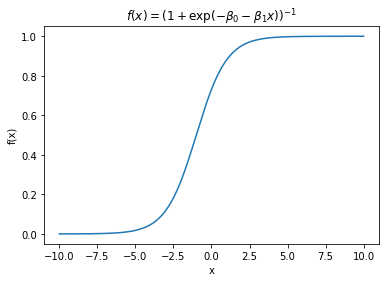

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def logisticFunction(x, b0=1, b1=1):
    """ calculate and return logistic function """
    return 1 / (1 + np.exp(-b0-b1*x))

x = np.linspace(-10,10,1000)

plt.plot(x, logisticFunction(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$f(x)=(1 + \\exp(-\\beta_0-\\beta_1x))^{-1}$")
plt.show()

The idea with the binary logistic regression is to find the probability for a stochastic variable $X$ to be part of some category $Y$, this is just a joint probability $P(Y|X)$. In terms of regression terminology $Y$ would be the response and $X$ the explanatory variable. $X$ can be a data-point and the categories can be expressed as $Y=\{0,1\}$. Since we work with data-points it is convenient to index them as
    $$X\rightarrow X_i$$
    $$Y\rightarrow Y_i=\{0,1\}$$
The probabilites can then be expressed as
    $$f(Y_i=1|\boldsymbol{X}_i,\boldsymbol{w}) = \frac{1}{1 + \exp(-\boldsymbol{X}_i^T\boldsymbol{w})}$$
    $$f(Y_i=0|\boldsymbol{X}_i,\boldsymbol{w}) = 1 - f(Y_i=1|\boldsymbol{X}_i)$$
The problem addressed is simply a dataset with points $\boldsymbol{X}_i$ and binary labels $Y_i\in\{0,1\}$. Considering drawing datapoints independently the likelihood of seing some data $D_i=\{(Y_i,\boldsymbol{X}_i)\}$ is
    $$P(D_i|\boldsymbol{w}) = \prod_{i=1}^n\left[f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right]^{Y_i} \left[1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right]^{1-Y_i},$$
and the maximum likelihood estimator(MLE) is defined as the set of parameters which maximizes the log-likelihood(log of above function). The expression for $\boldsymbol{w}$ is
    $$\boldsymbol{w}_{\text{MLE}}= \underset{\boldsymbol{w}}{\text{arg}\text{max}} \sum\limits_{i=1}^n \left[y_i\log\left(f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right) + (1 - Y_i)\log\left(1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right)\right].$$
The cost is just the negative log-likelihood and is known as the cross-entropy in statistics. The expression is
    $$C(\boldsymbol{w}) = -\sum\limits_{i=1}^n \left[Y_i\log\left(f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right) + (1 - Y_i)\log\left(1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right)\right].$$
The cross-entropy is convex by the second-derivative test(with respect to parameters $\boldsymbol{w}$) meaning a simple minimization gives the global minimum. The equation is
    $$\boldsymbol{0} = \nabla C(\boldsymbol{w}) = \sum_{i=1}^n\left[f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right) - Y_i\right]\boldsymbol{X}_i.$$
This is a transcendental equation for $\boldsymbol{w}$ which has to be solved numerically by some numerical optimization scheme such as gradient descent or some Quasi-Newton method.

### Random Forest Algorithm
A random forest is, in the context of data science, a family of randomized tree-based classifier decision trees. The basic structure of the decision tree is formed as a series of questions which partition the data. The random forest is then made by creating an ensemble of such trees with a randomization procedure, some of these are
- $\textbf{Bagging}$: Reduce variance by creating several subset of data from sample choosen in random with replacement. Each subset is then trained giving in total an ensemble of different models.
- $\textbf{Feature Bagging}$: Reduces correlations between decision trees by creating several subset of the features at each split of the tree.
- $\textbf{Extremized Random Forest}$: Prevent overfitting and reduce correllations, but reduce predictive power by combining ordinary and feature bagging with an extreme randomization procedure where the splitting is done at random instead of optimal criteria. 

### Neural Networks
A neural network is essentially just a linear transformation that weights the values of different inputs by a non-linear activation function and is a supervised learning method. The basic idea is with the so-called neuron which just represents a node (or element) in the network. Then, stack a number of these in to form a layer. The first layer is called the input and is represented by an $n\times d$ matrix
    $$\boldsymbol{x} = 
        \begin{pmatrix}
            x_{11} & \dots & x_{1d} \\
            \vdots & \ddots & \vdots \\
            x_{d1} & \dots & x_{nd}
        \end{pmatrix},$$
with the node being the elements in $\boldsymbol{x}$. A number of layers with sizes $(n_2,\dots,n_m)$ (number of nodes) are then laid between the input and the output, these are known as hidden layers. The weighting is then represented as a set of neuron-specific matrices
    $$\{\boldsymbol{w}\}^m_{l=1} = \left(\boldsymbol{w}^{(1)},\dots,\boldsymbol{w}^{(m)}\right).$$
The transformation in layer $l$ is then specified by $\boldsymbol{w}^{(l)}$ and the output serves as the input to the next layer. The last transformation gives the output. It is also common to introduce a bias $b^{(l)}$ meaning the transformation $z^{(l)}$ for layer $l$ is actually
    $$z^{(l)} = \boldsymbol{w}^{(l)}\cdot \boldsymbol{x} + b^{(l)}$$

The shape of $\boldsymbol{w}^{(l)}$ is determined by the layer. $\boldsymbol{w}^{(1)}$ is a $(d\times n_1)$ matrix where $n_i$ is the number of nodes in the first hidden layer and $\boldsymbol{w}^{(2)}$ has shape $n_1\times n_2$ and so on. In general the shape of $\boldsymbol{w}^{(i)}$ is $n_i \times n_{i+1}$ where $n_1=d$. 

With the neural-network model at hand the weights and the biases have to be determined. The procedure is the same as previously, define the cost function and minimize. We may write that given the data-point $(\boldsymbol{x}_i, y_i)$ the neural network makes a prediction $\hat{y}_i(\boldsymbol{w},\boldsymbol{b})$.

#### Backpropagation
In order to actually minimize the cost function a so-called backpropagation has to be made. Assuming our neural-network has
- $L$:            Number of layers
- $w^l_{jk}$:     Weight for $k$-th neuron in layer $l-1$ to $j$-th neuron in layer $l$
- $b^l_j$:        Bias of neuron $j$ in layer $l$
- $a^l_j$:        Activation of neuron $j$ in layer $l$

The activation is related by the non-linear transformation $\sigma$
    $$a^l_j = \sigma\left(\sum_k w^l_{kj}a^{l-1}_k\right).$$
We define two new quantities, the linear weigthed sum
    $$z^l_j = \sum_kw^l_{jk}a^{l-1}_k + b^l_j$$
and the error of neuron $j$
    $$\Delta^L_j = \frac{\partial E}{\partial z^L_j}.$$
The error of neuron $j$ in layer $l$ is equivalently
    $$\Delta^l_j = \frac{\partial E}{\partial z^l_j} = \frac{\partial E}{\partial a^l_j}\frac{\partial \sigma}{\partial z^l_j},$$
by the chain rule. The error terms can also be expressed as
    $$\Delta^l_j = \frac{\partial E}{\partial z^l_j} = \frac{\partial E}{\partial b^l_j}\frac{\partial b^l_j}{\partial z^l_j} = \frac{\partial E}{\partial b^l_j},$$
since
    $$\frac{\partial b^l_j}{\partial z^l_j} = 1.$$
The activation transformation can be expressed with $z^l_j$ as
    $$a^l_j = \sigma\left(z^l_j\right).$$
A third expression of the error is
    $$\Delta^L_j = \frac{\partial E}{\partial z^l_j} = \sum_k \frac{\partial E}{\partial z^{l+1}_k}\frac{\partial z^{l+1}_k}{\partial z^l_j} = \sum_k \Delta^{l+1}_k\frac{\partial z^{l+1}_k}{\partial z^l_j} = \left(\sum_k\Delta^{l+1}_kw^{l+1}_{kj}\right)\frac{\partial \sigma}{\partial z^l_j}.$$
The final expression involved is the derivative with respect to $w^l_{jk}$,
    $$\frac{\partial E}{\partial w^l_{jk}} = \frac{\partial E}{\partial z^l_j}\frac{\partial z^l_j}{\partial w^l_{jk}} = \Delta^l_ja^{l-1}_k.$$

Combining these algorithms the backpropagation algorithm is
1. $\textbf{Activation at input layer}$: Calculate activations $a^l_j$ of all neurons in the input layer.
2. $\textbf{Feedforward}$: Compute $z^l$ and $a^l$ for all subsequent layers.
3. $\textbf{Error at output}$: Calculate error in output layer with first expression for $\Delta^l_j$.
4. $\textbf{Backpropagate}$: Use third expression for $\Delta^l_j$ to calculate $\Delta^l_j$ for all layers.
5. $\textbf{Calculate Gradient}$: Calculate $\frac{\partial E}{\partial b^l_j}$ and $\frac{\partial E}{\partial w^l_{jk}}$.

With the efficient forward sweep through the network and one backpropagation the gradient is readily calculated and the minimization can be done with the same methods as with the logistic regression scheme.

#### Cost function
We have yet to mention the actual cost function with the neural network. These are the same as introduced with the linear regression schemes, that is either the mean-square error
    $$E(\boldsymbol{w},\boldsymbol{b}) = \frac{1}{N}\sum_i\left(y_i - \hat{y}_i(\boldsymbol{w},\boldsymbol{b})\right)^2,$$
and the mean absolute error($L_1$-norm)
    $$E(\boldsymbol{w},\boldsymbol{b}) = \frac{1}{N}\sum_i\left|y_i - \hat{y}_i(\boldsymbol{w},\boldsymbol{b})\right|.$$
The cross-entropy 
    $$C(\boldsymbol{w}) = -\sum\limits_{i=1}^n \left[y_i\log\left(\hat{y}_i(\boldsymbol{w})\right) + (1 - y_i)\log\left(1 - \hat{y}_i(\boldsymbol{w})\right)\right].$$
can still be used if the data is categorical. More generally if $y$ can take more values, $y\in{0,1,\dots,M-1}$, we may define
    $$y_{im} = \left\{\begin{matrix}
        1,& y_i = m \\
        0,& \text{else}
    \end{matrix}\right.,$$
and the categorical cross-entropy is
    $$E(\boldsymbol{w}) = -\sum_{i=1}^n \sum_{m=0}^{M-1}\left(y_{im} \log\left(\hat{y}_{im}(\boldsymbol{w})\right) + (1 - y_{im} \log\left(1 - \hat{y}_{im}(\boldsymbol{w})\right)\right).$$
Depending on the data one of these cost functions can be used in the backpropagation algorithm and the training can proceed.

## Implementation and Results
### Estimating the Coupling Constant of the 1D Ising Model
In estimating the coupling constant we use data generated with $J=1$ and use the linear regression schemes presented.

In order to use linear regression with the Ising model we assume the model (without any prior knowledge) the all-to-all Ising model
    $$E^{(i)} = -\sum\limits_{kl}^NJ_{kl}s^{(i)}_ks^{(i)}_l,$$
with the $J_{kl}$ being the coupling strengths we wish to learn. The index $i$ represents a sample point. This equation can be rewritten as the matrix equation
    $$E^{(i)} = -\boldsymbol{X}^{(i)} \cdot \boldsymbol{J},$$
with $\boldsymbol{X}^{(i)}$ representing the two-body interactions 
    $$\left\{s^{(i)}_k,s^{(i)}_l\right\}_{k,l=1}^N.$$
This is the exact linear regression presented earlier.

Let us first generate $N=10000$ states of a system of length $L=40$ and divide the data into a training set and test set. This is to test the performance of the algorithm on a set it has not seen before (hence the test set). 

In [51]:
import numpy as np
import scipy.sparse as sp

np.random.seed(12)

def ising_energies(states, L):
    """ Calculate energy """
    J = np.zeros((L,L),)
    for i in range(L):
        J[i, (i+1)%L] -= 1.0
    # end for
    
    return np.einsum('...i,ij,...j->...', states, J, states)
# end function ising_energies

L= 40 # system size
N = 10000 # number of states

# generate Ising states
states = np.random.choice([-1,1], size=(N, L))

energies = ising_energies(states, L)

# reshape states into a single index (i,j) --> p
states = np.einsum('...i,...j->...ij', states, states)
shape = states.shape
states = states.reshape((shape[0], shape[1]*shape[2]))

# build final set
data = [states, energies]

n_samples = 400 # number of samples

# define training and test data
X_train=data[0][:n_samples]
Y_train=data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=data[0][n_samples:3*n_samples//2]
Y_test=data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

Now we can start to apply the least-squares, ridge regression and LASSO methods using the scikit-learn package.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


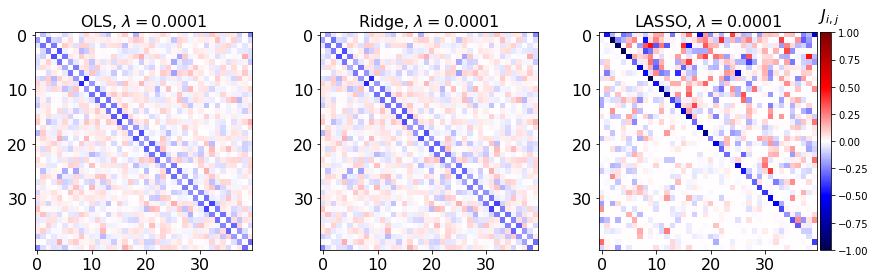

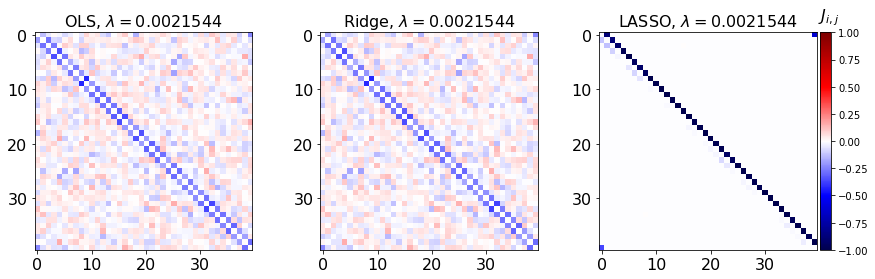

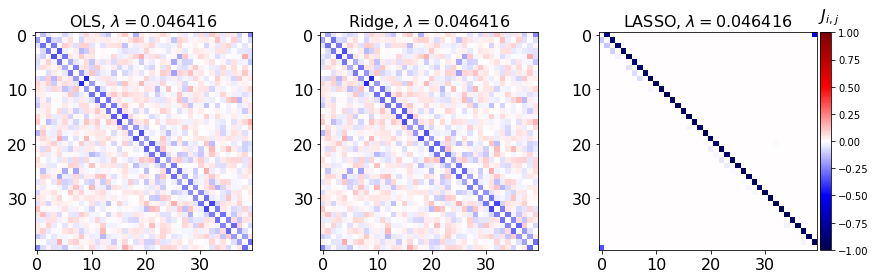

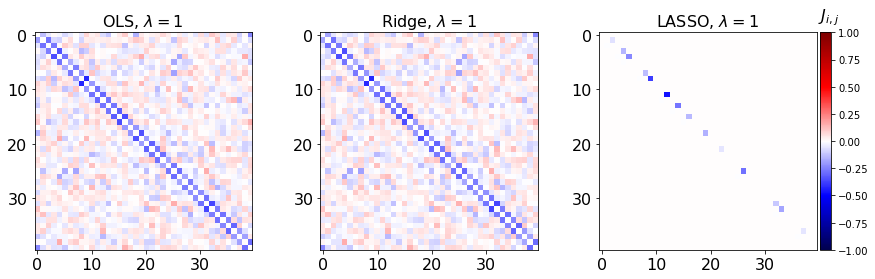

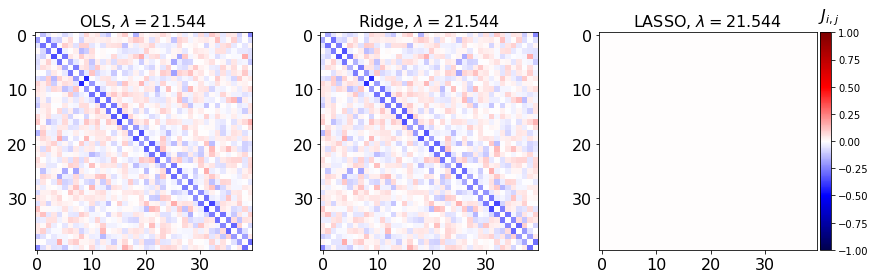

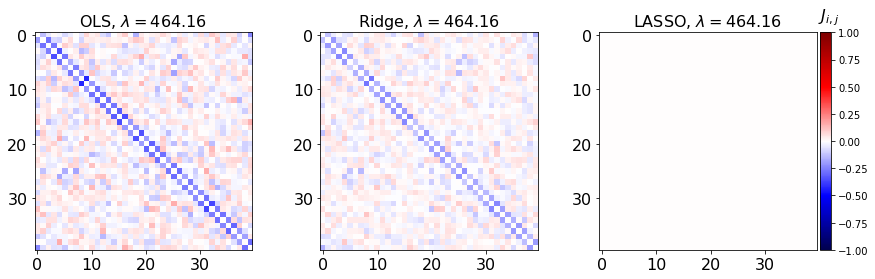

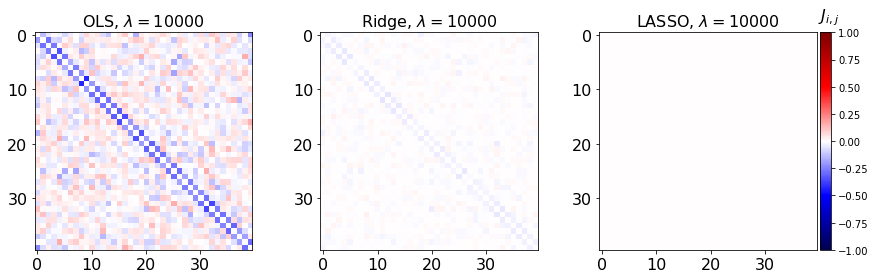

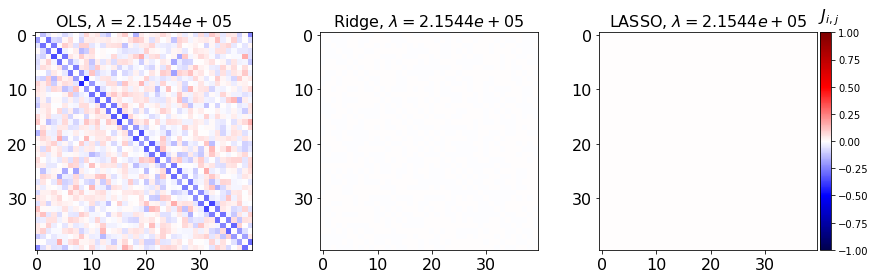

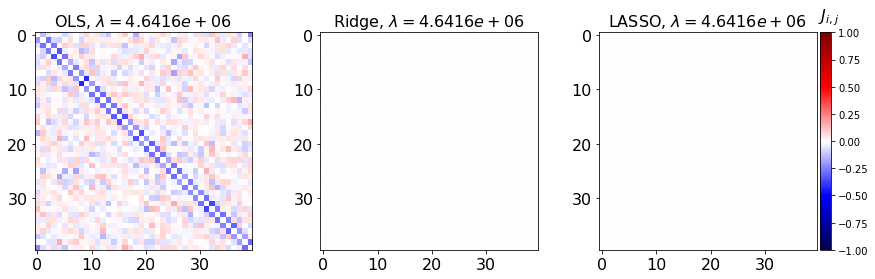

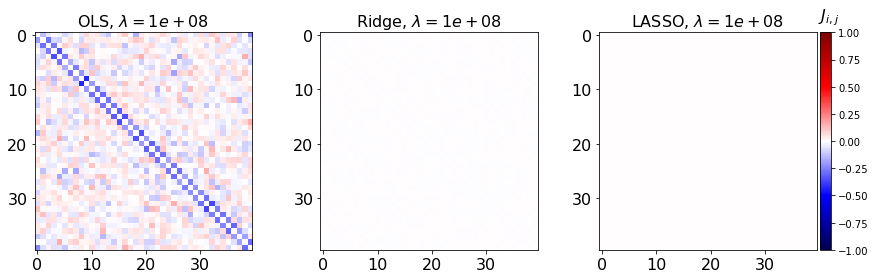

In [52]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_plot(coefs, L, lamdas, titles=['OLS', 'Ridge', 'LASSO']):
    """ plot results """
      
    cmap_args = dict(vmin=-1., vmax=1., cmap='seismic')
    for l,lamda in enumerate(lamdas):
        fig, ax = plt.subplots(nrows=1, ncols=len(coefs))
        for i,coeff in enumerate(coefs):
            J = np.array(coeff[l]).reshape((L,L))
            im = ax[i].imshow(J, **cmap_args)
            ax[i].set_title(titles[i] + ", $\\lambda=%.5g$" % lamda, fontsize=16)
            ax[i].tick_params(labelsize=16)
        # end forl
          
        divider = make_axes_locatable(ax[2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(im, cax=cax)
    
        cbar.set_label('$J_{i,j}$', labelpad=-40, y=1.12, fontsize=16, rotation=0)
        fig.subplots_adjust(right=2.0)
    # end fori
      
    plt.show()
# end function make_plot

def apply_method(model, x_train, y_train, x_test, y_test, lamda=None):
    """ apply model, return weights and performance score """
    
    # set regularization parameter if given
    if lamda:
        model.set_params(alpha=lamda)
    # end if
    
    # run fitting and store weights
    model.fit(x_train, y_train)
    
    return model.coef_, model.score(x_train, y_train), model.score(x_test, y_test)
# end function apply_method

def grab_axis(nested_list, j=0):
    """ slice list and return axis j """
    return [[i[j] for i in r] for r in nested_list]
# end function grab_axis_i

# list for results
results = []

# regularization parameters
lamdas = np.logspace(-4,8,10)

least_squares_results = apply_method(linear_model.LinearRegression(), X_train, Y_train, X_test, Y_test)
results.append([least_squares_results for r in range(len(lamdas))])

for rl in [linear_model.Ridge(), linear_model.Lasso()]:
    tmp_res = []
    for lamda in lamdas:
        tmp_res.append(apply_method(rl, X_train, Y_train, X_test, Y_test, lamda))
    # end for lamda
    results.append(tmp_res)
# end for rl

make_plot(grab_axis(results,0), L, lamdas)

In order to actually see the performance we plot the training and test errors.

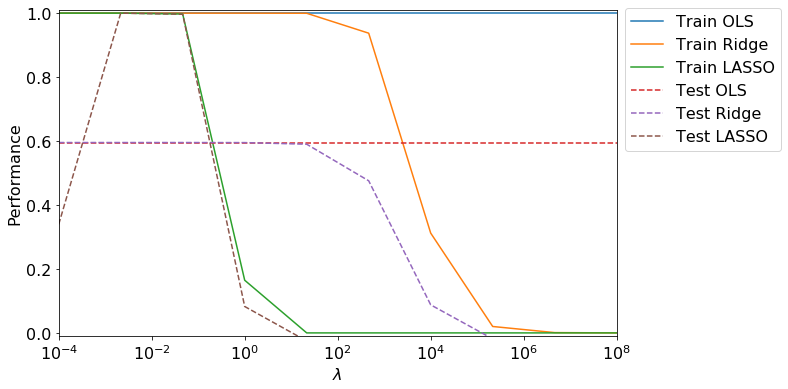

In [53]:
def plot_errors(train_errors, test_errors, lamdas, titles=["OLS", "Ridge", "LASSO"]):
    """ plot in-sample and out-of-sample errors, aka performance"""
    for i,trnerr in enumerate(train_errors):
        plt.semilogx(lamdas, trnerr, label="Train " + titles[i])
    # end fori
    
    for i,tsterr in enumerate(test_errors):
        plt.semilogx(lamdas, tsterr, '--', label="Test " + titles[i])
    # end fori
    
    fig = plt.gcf()
    fig.set_size_inches(10.0, 6.0)
    
    plt.legend(bbox_to_anchor=(1.0, 1.03),fontsize=16)
    plt.ylim([-0.01, 1.01])
    plt.xlim([min(lamdas), max(lamdas)])
    plt.xlabel(r'$\lambda$',fontsize=16)
    plt.ylabel('Performance',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()
# end function plot_errors

plot_errors(grab_axis(results, 1), grab_axis(results, 2), lamdas)

From the plot of the linear fit we can see that all methods seemingly fits the data well, however the performance plot indicates that all three methods overfit the data. With the OLS the overfitting cannot be fixed since no regularization is involved. For the Ridge method the overfitting is less as $\lambda$ is increased, however the fit is worse. For the LASSO method the same applies, but the overfitting is much less and the performance is actually indicates that the fit is spot-on for $\lambda\approx 10^{-2}$. For this $\lambda$ we see that $J$ only contains nearest-neghbour terms which is how the original data was generated.

### Determine the Phase of the Two-Dimensional Ising Model
The binary logistic regression can be used to determine the phase of the two-dimensional Ising model. The Hamiltonian is given by
    $$H = -J\sum_{<kl>}s_ks_l,$$
with the $k$ and $l$ indices running over the nearest neighbors on a 2D square lattice. $J$ is the energy scale. It has been proved by Onsager that the system undergoas a phase transition in between the ordered and disordered state at a critical temperature
    $$\frac{T_c}{J} = \frac{2}{\log\left(1 + \sqrt{2}\right)} \approx 2.26.$$
The question is then, can we train a classifier to distinguish the two phases of the Ising model. The problem is then a binary classification since we have two categories, namely ordered and unordered. With
- Ordered: $\frac{T}{J} < 2.0$
- Near-critical: $2.0 \leq \frac{T}{J} \leq 2.5$
- Disorderd: $\frac{T}{J} \geq 2.0$

Firstly we need some data. We use the data provided by the mentioned article. These are data of $10^{4}$ states from Monte-Carlo simulations on a $L\times L$ square lattice with $L=40$.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


X_train shape: (64999, 1600)
Y_train shape: (64999,)

64999 train samples
30000 critical samples
65000 test samples


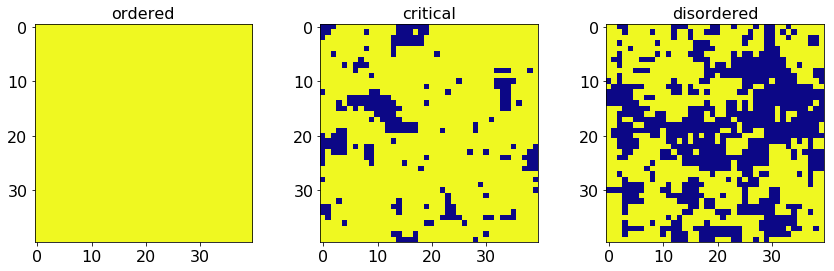

In [54]:
import pickle
import os
from sklearn.model_selection import train_test_split

def plot_2D_states(states, L, titles=["ordered", "critical", "disordered"]):
    """visualize states"""
    cmap_args = dict(cmap='plasma_r')
    
    fig, ax = plt.subplots(nrows=1, ncols=len(states))
    
    for i,s in enumerate(states):
        ax[i].imshow(s.reshape(L,L), **cmap_args)
        ax[i].set_title(titles[i], fontsize=16)
        ax[i].tick_params(labelsize=16)
    # end fors
    
    fig.subplots_adjust(right=2.0)
    
    plt.show()
# end function plot_2D_states

# shuffle generator seed
np.random.seed()

# Ising parameters
L = 40
J = -1.0
T = np.linspace(0.25,4.0,16)
T_c = 2.26

# define regression parameters
num_classes = 2
train_test_ratio = 0.5

# load data (all of it)
data_path = "IsingData/"
data = pickle.load(open(data_path + "Ising2DFM_reSample_L40_T=All.pkl", 'rb'))
data = np.unpackbits(data).reshape(-1, 1600)
data = data.astype(np.int32)
data[np.where(data==0)] = -1

# load labels (all of it)
labels = pickle.load(open(data_path + "Ising2DFM_reSample_L40_T=All_labels.pkl", "rb"))

# divide data into ordered, critical and disordered
start1 = 0
end1 = 70000
end2 = 100000
end3 = -1
X_ordered=data[start1:end1,:]
Y_ordered=labels[start1:end1]

X_critical=data[end1:end2,:]
Y_critical=labels[end1:end2]

X_disordered=data[end2:end3,:]
Y_disordered=labels[end2:end3]

del data,labels

# define training and test
Xt=np.concatenate((X_ordered,X_disordered))
Yt=np.concatenate((Y_ordered,Y_disordered))

# pick at random to create training and test
X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=train_test_ratio)

# create full data set
X = np.concatenate((X_critical,Xt))
Y = np.concatenate((Y_critical,Yt))

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_critical.shape[0], 'critical samples')
print(X_test.shape[0], 'test samples')

# plot data
plot_2D_states([X_ordered[int((end1-start1)/2)], 
                X_critical[int((end2-end1)/2)], 
                X_disordered[int((end3-end2)/2)]], L)

Now that we have the data, the regression can be applied.

In [57]:
from sklearn import linear_model

# set regularization parameters
lamdas = np.logspace(-5,5,5)

# preallocate data
train_accuracy=np.zeros(lamdas.shape,np.float64)
test_accuracy=np.zeros(lamdas.shape,np.float64)
critical_accuracy=np.zeros(lamdas.shape,np.float64)

train_accuracy_l1=np.zeros(lamdas.shape,np.float64)
test_accuracy_l1=np.zeros(lamdas.shape,np.float64)
critical_accuracy_l1=np.zeros(lamdas.shape,np.float64)

train_accuracy_SGD=np.zeros(lamdas.shape,np.float64)
test_accuracy_SGD=np.zeros(lamdas.shape,np.float64)
critical_accuracy_SGD=np.zeros(lamdas.shape,np.float64)

train_preds = []
test_preds = []
critical_preds = []

train_preds_l1 = []
test_preds_l1 = []
critical_preds_l1 = []

train_preds_SGD = []
test_preds_SGD = []
critical_preds_SGD = []

print('accuracy: train, test, critical')
for i,lamda in enumerate(lamdas):
    # perform liblinear based logistic regression  
    logreg = linear_model.LogisticRegression(C=1./lamda, random_state=1, verbose=0, max_iter=1e3, tol=1e-5)
    logreg.fit(X_train, Y_train)
    train_accuracy[i] = logreg.score(X_train, Y_train)
    test_accuracy[i] = logreg.score(X_test, Y_test)
    critical_accuracy[i] = logreg.score(X_critical, Y_critical)
    
    train_preds.append(logreg.predict_proba(X_train)[:,0])
    test_preds.append(logreg.predict_proba(X_test)[:,0])
    critical_preds.append(logreg.predict_proba(X_critical)[:,0])

    print('liblin: %0.4f, %0.4f, %0.4f' % (train_accuracy[i],test_accuracy[i],critical_accuracy[i]))
    
    # perform liblinear with L1-norm based logistic regression  
    logreg_l1 = linear_model.LogisticRegression(penalty='l1', C=1./lamda, random_state=1, verbose=0, 
                                                   max_iter=1e3, tol=1e-5)
    logreg_l1.fit(X_train, Y_train)
    train_accuracy_l1[i] = logreg_l1.score(X_train, Y_train)
    test_accuracy_l1[i] = logreg_l1.score(X_test, Y_test)
    critical_accuracy_l1[i] = logreg_l1.score(X_critical, Y_critical)
    
    train_preds_l1.append(logreg_l1.predict_proba(X_train)[:,0])
    test_preds_l1.append(logreg_l1.predict_proba(X_test)[:,0])
    critical_preds_l1.append(logreg_l1.predict_proba(X_critical)[:,0])

    print('liblinl1: %0.4f, %0.4f, %0.4f' % (train_accuracy_l1[i],test_accuracy_l1[i],critical_accuracy_l1[i]))
    
    # perform SGD-based logistic regression
    logreg_SGD = linear_model.SGDClassifier(loss='log', penalty='l2', alpha=lamda, max_iter=100, 
                                            shuffle=True, random_state=1, learning_rate='optimal')
    logreg_SGD.fit(X_train, Y_train)
    train_accuracy_SGD[i] = logreg_SGD.score(X_train, Y_train)
    test_accuracy_SGD[i] = logreg_SGD.score(X_test, Y_test)
    critical_accuracy_SGD[i] = logreg_SGD.score(X_critical, Y_critical)
    
    train_preds_SGD.append(logreg_SGD.predict_proba(X_train)[:,0])
    test_preds_SGD.append(logreg_SGD.predict_proba(X_test)[:,0])
    critical_preds_SGD.append(logreg_SGD.predict_proba(X_critical)[:,0])
    
    print('SGD: %0.4f, %0.4f, %0.4f' % (train_accuracy_SGD[i],test_accuracy_SGD[i],critical_accuracy_SGD[i]))
# end fori

accuracy: train, test, critical
liblin: 0.7272, 0.6917, 0.6209
liblinl1: 0.7272, 0.6917, 0.6209
SGD: 0.4811, 0.4658, 0.5219
liblin: 0.7272, 0.6917, 0.6209
liblinl1: 0.7272, 0.6917, 0.6209
SGD: 0.7259, 0.6897, 0.6208
liblin: 0.7272, 0.6917, 0.6209
liblinl1: 0.7269, 0.6913, 0.6214
SGD: 0.5383, 0.5387, 0.6667
liblin: 0.7260, 0.6904, 0.6246
liblinl1: 0.5383, 0.5386, 0.6667
SGD: 0.5383, 0.5386, 0.6667
liblin: 0.6992, 0.6701, 0.6647
liblinl1: 0.4617, 0.4614, 0.3333
SGD: 0.5383, 0.5386, 0.6667


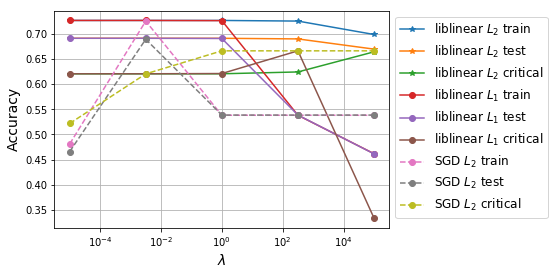

In [58]:
plt.semilogx(lamdas, train_accuracy, "*-", label='liblinear $L_2$ train')
plt.semilogx(lamdas, test_accuracy, "*-", label='liblinear $L_2$ test')
plt.semilogx(lamdas, critical_accuracy, "*-", label='liblinear $L_2$ critical')

plt.semilogx(lamdas, train_accuracy_l1, "o-", label='liblinear $L_1$ train')
plt.semilogx(lamdas, test_accuracy_l1, "o-", label='liblinear $L_1$ test')
plt.semilogx(lamdas, critical_accuracy_l1, "o-", label='liblinear $L_1$ critical')

plt.semilogx(lamdas, train_accuracy_SGD, "o--", label='SGD $L_2$ train')
plt.semilogx(lamdas, test_accuracy_SGD, "o--", label='SGD $L_2$ test')
plt.semilogx(lamdas, critical_accuracy_SGD, "o--", label='SGD $L_2$ critical')

plt.grid()
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("$\\lambda$", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=12)

plt.show()

We can immedietly see a degree og overfitting and the performance of the optimizer depends on the regularization strength $\lambda$. There is also a sweet spot similarly to the logistic regression case for the SGD. Here it is around $\lambda\approx 10^{-1}$. The phase is also difficult to predict around the critical region. For the liblinear, lbfgs and saga the performance only drops as $\lambda$ is increased much (above around $10^3$). This just indicates that the regularisation strength does not have much impact. 

We can also make a receiver operator characteristic (ROC) to further diagonize the classifier.

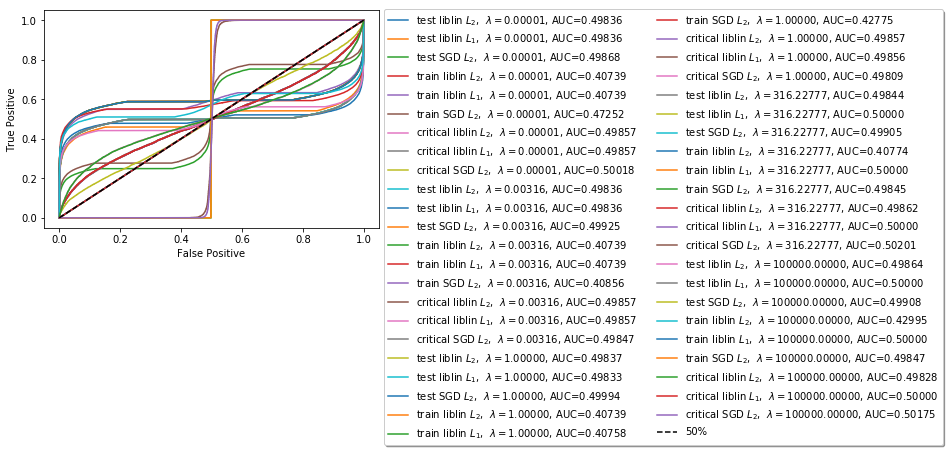

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

for i,lamda in enumerate(lamdas):
    logreg_tpr, logreg_fpr, _ = roc_curve(Y_test, test_preds[i])
    logreg_l1_tpr, logreg_l1_fpr, _ = roc_curve(Y_test, test_preds_l1[i])
    logreg_SGD_tpr, logreg_SGD_fpr, _ = roc_curve(Y_test, test_preds_SGD[i])
    
    logreg_auc = roc_auc_score(Y_test, test_preds[i])
    logreg_l1_auc = roc_auc_score(Y_test, test_preds_l1[i])
    logreg_SGD_auc = roc_auc_score(Y_test, test_preds_SGD[i])

    plt.plot(logreg_fpr, logreg_tpr, label="test liblin $L_2$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_auc))
    plt.plot(logreg_l1_fpr, logreg_l1_tpr, label="test liblin $L_1$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_l1_auc))
    plt.plot(logreg_SGD_fpr, logreg_SGD_tpr, label="test SGD $L_2$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_SGD_auc))
    
    logreg_tpr, logreg_fpr, _ = roc_curve(Y_train, train_preds[i])
    logreg_l1_tpr, logreg_l1_fpr, _ = roc_curve(Y_train, train_preds_l1[i])
    logreg_SGD_tpr, logreg_SGD_fpr, _ = roc_curve(Y_train, train_preds_SGD[i])
    
    logreg_auc = roc_auc_score(Y_train, train_preds[i])
    logreg_l1_auc = roc_auc_score(Y_train, train_preds_l1[i])
    logreg_SGD_auc = roc_auc_score(Y_train, train_preds_SGD[i])

    plt.plot(logreg_fpr, logreg_tpr, label="train liblin $L_2$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_auc))
    plt.plot(logreg_l1_fpr, logreg_l1_tpr, label="train liblin $L_1$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_l1_auc))
    plt.plot(logreg_SGD_fpr, logreg_SGD_tpr, label="train SGD $L_2$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_SGD_auc))
    
    logreg_tpr, logreg_fpr, _ = roc_curve(Y_critical, critical_preds[i])
    logreg_l1_tpr, logreg_l1_fpr, _ = roc_curve(Y_critical, critical_preds_l1[i])
    logreg_SGD_tpr, logreg_SGD_fpr, _ = roc_curve(Y_critical, critical_preds_SGD[i])
    
    logreg_auc = roc_auc_score(Y_critical, critical_preds[i])
    logreg_l1_auc = roc_auc_score(Y_critical, critical_preds_l1[i])
    logreg_SGD_auc = roc_auc_score(Y_critical, critical_preds_SGD[i])

    plt.plot(logreg_fpr, logreg_tpr, label="critical liblin $L_2$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_auc))
    plt.plot(logreg_l1_fpr, logreg_l1_tpr, label="critical liblin $L_1$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_l1_auc))
    plt.plot(logreg_SGD_fpr, logreg_SGD_tpr, label="critical SGD $L_2$,  $\lambda=%.5f$, AUC=$%.5f$" % (lamda, logreg_SGD_auc))
# end fori

plt.plot((0,1), (0,1), "--k", label='50%')

plt.legend(bbox_to_anchor=(1.0, 1.027), shadow=True, fancybox=True, ncol=2)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()

The ROC-curve tells us how many predictions were actually correct. Essentially this means the more the graph is above the naive-guess-line (diagonal), the better since the ratio between positive and negative then favors positive. The AUC score (area under curve) gives the probability for the classifier to rank a randomly choosen positive instance higher than an equally choosen negative one.

### Using Random Forest to Classify Phases in the Ising Model
As with the logistic regression, Random Forest algorithm can be used to determine the phases of the Ising model. We start with the ordinary out-of-bag method (ordinary bagging).

In [60]:
# increase training set, reduce test set
train_test_ratio = 0.8

# pick at random to create training and test
X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=train_test_ratio)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_critical.shape[0], 'critical samples')
print(X_test.shape[0], 'test samples')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


X_train shape: (103999, 1600)
Y_train shape: (103999,)

103999 train samples
30000 critical samples
26000 test samples


In [61]:
from sklearn.ensemble import RandomForestClassifier

min_estimators = 10
max_estimators = 61
n_estimators = np.arange(min_estimators, max_estimators, 5)
leaf_sizes = [2, 10000]
n = len(n_estimators)
m = len(leaf_sizes)

RFC_OOB_accuracy = np.zeros((n,m))
RFC_train_accuracy = np.zeros((n,m))
RFC_test_accuracy = np.zeros((n,m))
RFC_critical_accuracy = np.zeros((n,m))

rfc_train_preds = []
rfc_test_preds = []
rfc_critical_preds = []

print('train estimate test critical')
for i in range(0,n):
    for j in range(0,m):
        RFC = RandomForestClassifier(n_estimators=n_estimators[i], max_depth=None,
                                     min_samples_split=leaf_sizes[j], oob_score=True, random_state=0)
        RFC.fit(X_train, Y_train)
        
        RFC_train_accuracy[i,j] = RFC.score(X_train, Y_train)
        RFC_OOB_accuracy[i,j] = RFC.oob_score
        RFC_test_accuracy[i,j] = RFC.score(X_test, Y_test)
        RFC_critical_accuracy[i,j] = RFC.score(X_critical, Y_critical)
        
        rfc_train_preds.append(RFC.predict_proba(X_train)[:,0])
        rfc_test_preds.append(RFC.predict_proba(X_test)[:,0])
        rfc_critical_preds.append(RFC.predict_proba(X_critical)[:,0])
        
        print('n_estimators: ' + str(n_estimators[i]) + ', leaf_size: ' + str(leaf_sizes[j]))
        print('liblin: %0.4f, %0.4f,  %0.4f, %0.4f \n\n' % (RFC_train_accuracy[i,j],
                                                            RFC_OOB_accuracy[i,j],
                                                            RFC_test_accuracy[i,j],
                                                            RFC_critical_accuracy[i,j]))
    # end forj
# end fori


train estimate test critical


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimators: 10, leaf_size: 2
liblin: 1.0000, 1.0000,  0.9999, 0.8031 




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimators: 10, leaf_size: 10000
liblin: 0.9992, 1.0000,  0.9991, 0.6778 




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimators: 15, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8309 




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimators: 15, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9992, 0.6812 




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimators: 20, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8199 




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimators: 20, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9993, 0.6829 




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimators: 25, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8328 




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


n_estimators: 25, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9993, 0.6848 


n_estimators: 30, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8238 


n_estimators: 30, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9993, 0.6864 


n_estimators: 35, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8348 


n_estimators: 35, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9993, 0.6857 


n_estimators: 40, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8279 


n_estimators: 40, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9993, 0.6854 


n_estimators: 45, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8345 


n_estimators: 45, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9993, 0.6864 


n_estimators: 50, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8292 


n_estimators: 50, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9993, 0.6859 


n_estimators: 55, leaf_size: 2
liblin: 1.0000, 1.0000,  1.0000, 0.8360 


n_estimators: 55, leaf_size: 10000
liblin: 0.9993, 1.0000,  0.9993, 0.6857 


n_estimato

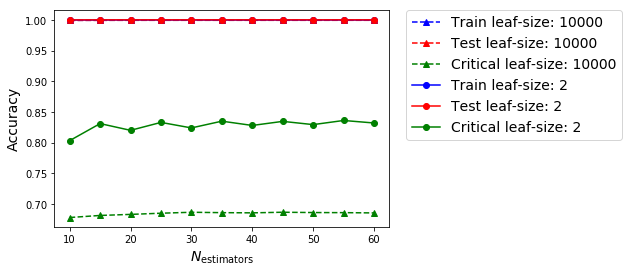

In [62]:
plt.figure()
plt.plot(n_estimators,RFC_train_accuracy[:,1],'--b^',label='Train leaf-size: 10000')
plt.plot(n_estimators,RFC_test_accuracy[:,1],'--r^',label='Test leaf-size: 10000')
plt.plot(n_estimators,RFC_critical_accuracy[:,1],'--g^',label='Critical leaf-size: 10000')

plt.plot(n_estimators,RFC_train_accuracy[:,0],'o-b',label='Train leaf-size: 2')
plt.plot(n_estimators,RFC_test_accuracy[:,0],'o-r',label='Test leaf-size: 2')
plt.plot(n_estimators,RFC_critical_accuracy[:,0],'o-g',label='Critical leaf-size: 2')

plt.xlabel('$N_\mathrm{estimators}$', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)

plt.show()

Again we can plot an ROC-curve to see how well the prediction is.

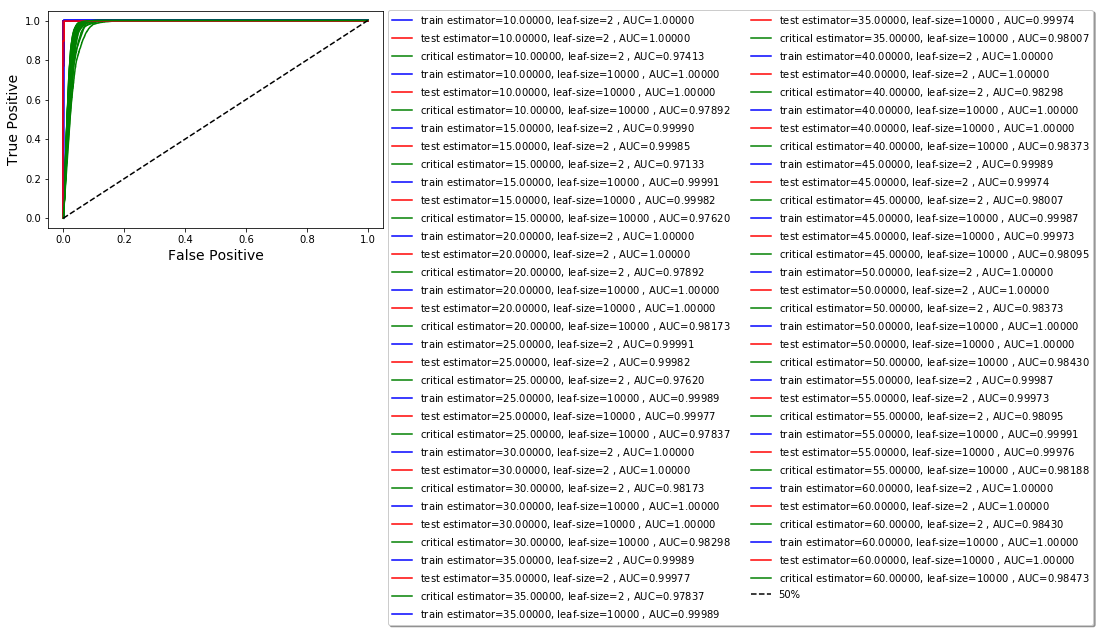

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score


rfc_preds = [rfc_train_preds, rfc_test_preds, rfc_critical_preds]
Ys = [Y_train, Y_test, Y_critical]
labs = ["train", "test", "critical"]
ttc_colors = ['blue', 'red', 'green']

for i,e in enumerate(n_estimators):
    for j,l in enumerate(leaf_sizes):
        for k,rp in enumerate(rfc_preds):
            rfc_tpr, rfc_fpr, _ = roc_curve(Ys[k], rp[i*m+j])
    
            rfc_auc = 1-roc_auc_score(Ys[k], rp[i+j*m])
    
            plt.plot(rfc_fpr, rfc_tpr, ttc_colors[k], label=labs[k] + \
                     " estimator=$%.5f$, leaf-size=$%.5g$ , AUC=$%.5f$" 
                     % (e, l, rfc_auc))
        # end fork
    # end forj
# end fori

plt.plot((0,1), (0,1), "--k", label='50%')

plt.legend(bbox_to_anchor=(1.0, 1.027), fancybox=True, shadow=True, ncol=2)
plt.xlabel("False Positive", fontsize=14)
plt.ylabel("True Positive", fontsize=14)
plt.show()

And secondly the Extremely Randomized Trees.

In [67]:
from sklearn.ensemble import ExtraTreesClassifier

ETC_train_accuracy=np.zeros((n,m))
ETC_test_accuracy=np.zeros((n,m))
ETC_critical_accuracy=np.zeros((n,m))

etc_train_preds = []
etc_test_preds = []
etc_critical_preds = []

print('train test critical')
for i in range(0,n):
    for j in range(0,m):
        ETC = ExtraTreesClassifier(n_estimators=n_estimators[i], max_depth=None, 
                                   min_samples_split=leaf_sizes[j],random_state=0)
        ETC.fit(X_train, Y_train)
        
        ETC_train_accuracy[i,j] = ETC.score(X_train,Y_train)
        ETC_test_accuracy[i,j] = ETC.score(X_test,Y_test)
        ETC_critical_accuracy[i,j] = ETC.score(X_critical,Y_critical)
        
        etc_train_preds.append(ETC.predict_proba(X_train)[:,0])
        etc_test_preds.append(ETC.predict_proba(X_test)[:,0])
        etc_critical_preds.append(ETC.predict_proba(X_critical)[:,0])
        
        print('n_estimators: ' + str(n_estimators[i]) + ', leaf_size: ' + str(leaf_sizes[j]))
        print('liblin: %0.4f,  %0.4f, %0.4f \n' % (ETC_train_accuracy[i,j],
                                                     ETC_test_accuracy[i,j],
                                                     ETC_critical_accuracy[i,j]))

train test critical
n_estimators: 10, leaf_size: 2
liblin: 1.0000,  1.0000, 0.8039 

n_estimators: 10, leaf_size: 10000
liblin: 0.9991,  0.9991, 0.6789 

n_estimators: 15, leaf_size: 2
liblin: 1.0000,  1.0000, 0.8297 

n_estimators: 15, leaf_size: 10000
liblin: 0.9992,  0.9992, 0.6819 

n_estimators: 20, leaf_size: 2
liblin: 1.0000,  1.0000, 0.8187 

n_estimators: 20, leaf_size: 10000
liblin: 0.9993,  0.9992, 0.6825 

n_estimators: 25, leaf_size: 2
liblin: 1.0000,  1.0000, 0.8324 

n_estimators: 25, leaf_size: 10000
liblin: 0.9993,  0.9992, 0.6835 

n_estimators: 30, leaf_size: 2
liblin: 1.0000,  1.0000, 0.8255 

n_estimators: 30, leaf_size: 10000
liblin: 0.9993,  0.9992, 0.6849 

n_estimators: 35, leaf_size: 2
liblin: 1.0000,  1.0000, 0.8352 

n_estimators: 35, leaf_size: 10000
liblin: 0.9993,  0.9992, 0.6843 

n_estimators: 40, leaf_size: 2
liblin: 1.0000,  1.0000, 0.8276 

n_estimators: 40, leaf_size: 10000
liblin: 0.9993,  0.9993, 0.6843 

n_estimators: 45, leaf_size: 2
liblin: 1.0

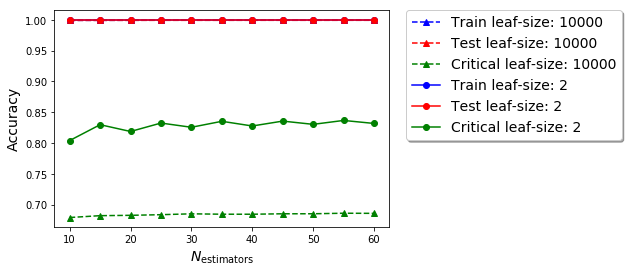

In [68]:
# plot accuracy against regularisation strength
plt.figure()
plt.plot(n_estimators,ETC_train_accuracy[:,1],'--b^',label='Train leaf-size: 10000')
plt.plot(n_estimators,ETC_test_accuracy[:,1],'--r^',label='Test leaf-size: 10000')
plt.plot(n_estimators,ETC_critical_accuracy[:,1],'--g^',label='Critical leaf-size: 10000')

plt.plot(n_estimators,ETC_train_accuracy[:,0],'o-b',label='Train leaf-size: 2')
plt.plot(n_estimators,ETC_test_accuracy[:,0],'o-r',label='Test leaf-size: 2')
plt.plot(n_estimators,ETC_critical_accuracy[:,0],'o-g',label='Critical leaf-size: 2')

plt.xlabel('$N_\mathrm{estimators}$', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True, shadow=True, fontsize=14)

plt.show()

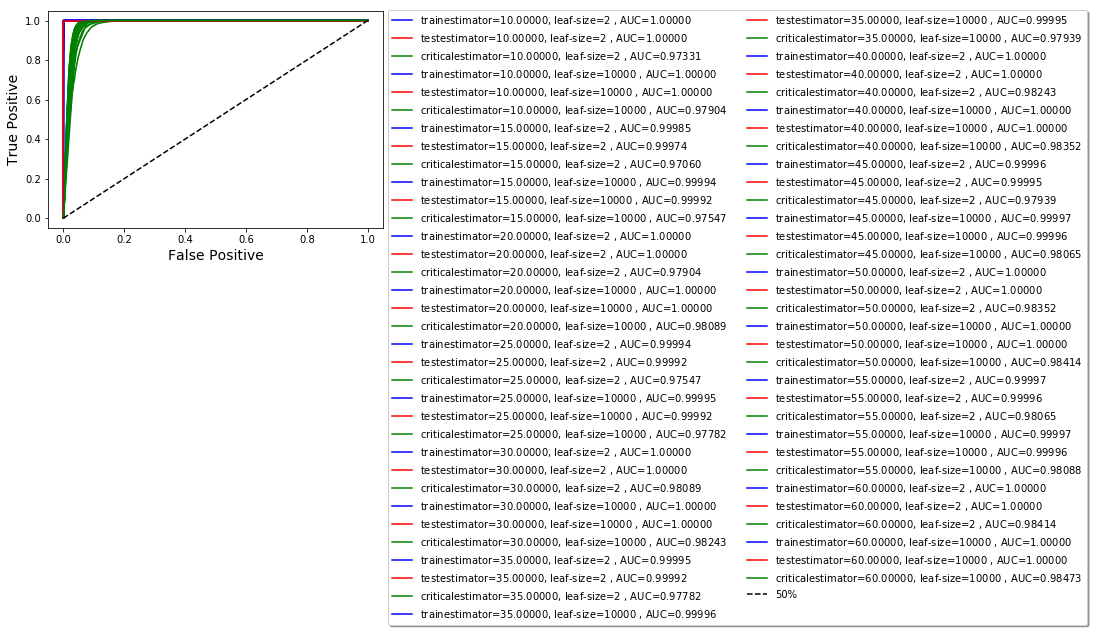

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

etc_preds = [etc_train_preds, etc_test_preds, etc_critical_preds]

for i,e in enumerate(n_estimators):
    for j,l in enumerate(leaf_sizes):
        for k,ep in enumerate(etc_preds):
            etc_tpr, etc_fpr, _ = roc_curve(Ys[k], ep[i*m+j])
    
            etc_auc = 1-roc_auc_score(Ys[k], ep[i+j*m])
    
            plt.plot(etc_fpr, etc_tpr, ttc_colors[k], label=labs[k] + \
                     "estimator=$%.5f$, leaf-size=$%.5g$ , AUC=$%.5f$" 
                     % (e, l, etc_auc))
        # end fok
    # end forj
# end fori

plt.plot((0,1), (0,1), "--k", label='50%')

plt.legend(bbox_to_anchor=(1.0, 1.027), fancybox=True, shadow=True, ncol=2)
plt.xlabel("False Positive", fontsize=14)
plt.ylabel("True Positive", fontsize=14)
plt.show()

As we can see with both the bagging and the randomized trees the performance is good. The critical case is still hard to determine, as is expected. In comparison to the logistic regression, the random forest seems to perform better

### Classifying the Ising Model Phase Using Neural Networks
Just as we could use the logistic regression and random forest methods to find the phases of the Ising model we can use a feed-forward neural network to do the same. We will use the libraries TensorFlow and Keras. First let us make a class to load the data and to shuffle the data as the latter is useful in the training procedure in TensorFlow.

In [31]:
import argparse
import os
import pickle
import collections
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.framework import dtypes
from keras.utils import to_categorical

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.set_random_seed(12)

class DataSet(object):
    def __init__(self, data_X, data_Y, dtype=dtypes.float32):
        dtype = dtypes.as_dtype(dtype).base_dtype
        if dtype not in (dtypes.uint8, dtypes.float32):
            raise TypeError('Invalid dtype %r, expected uint8 or float32' % dtype)
        
        assert data_X.shape[0] == data_Y.shape[0], ('data_X.shape: %s data_Y.shape: %s' % (data_X.shape, 
                                                                                           data_Y.shape))
        self.num_examples = data_X.shape[0]
    
        if dtype == dtypes.float32:
            data_X = data_X.astype(np.float32)
        # end if
        
        self.data_X = data_X
        self.data_Y = data_Y 

        self.epochs_completed = 0
        self.index_in_epoch = 0
    # end __init__
    
    def next_batch(self, batch_size, seed=None):
        """Return the next `batch_size` examples from this data set."""

        if seed:
            np.random.seed(seed)
        # end if

        start = self.index_in_epoch
        self.index_in_epoch += batch_size
        if self.index_in_epoch > self.num_examples:
            # Finished epoch
            self.epochs_completed += 1
            
            # Shuffle the data
            perm = np.arange(self.num_examples)
            np.random.shuffle(perm)
            self.data_X = self.data_X[perm]
            self.data_Y = self.data_Y[perm]
            
            # Start next epoch
            start = 0
            self.index_in_epoch = batch_size
            assert batch_size <= self.num_examples
        # end if
            
        end = self.index_in_epoch

        return self.data_X[start:end], self.data_Y[start:end]
    # end function next_batch
# end class DataSet

def read_data_set(dtype=dtypes.float32, train_size=80000, validation_size=5000):
    """read and reshape data"""
    
    # load data (all of it)
    data_path = "IsingData/"
    data = pickle.load(open(data_path + "Ising2DFM_reSample_L40_T=All.pkl", 'rb'))
    data = np.unpackbits(data).reshape(-1, 1600)
    data = data.astype('int')
    data[np.where(data==0)] = -1

    # load labels (all of it)
    labels = pickle.load(open(data_path + "Ising2DFM_reSample_L40_T=All_labels.pkl", "rb"))

    # divide data into ordered, critical and disordered
    X_ordered=data[:70000,:]
    Y_ordered=labels[:70000]

    X_critical=data[70000:100000,:]
    Y_critical=labels[70000:100000]

    X_disordered=data[100000:,:]
    Y_disordered=labels[100000:]

    del data,labels

    # define training and test
    X=np.concatenate((X_ordered,X_disordered))
    Y=np.concatenate((Y_ordered,Y_disordered))
    
    del X_ordered, X_disordered, Y_ordered, Y_disordered
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size)
    
    del X,Y
    
    # make data categorical
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    Y_critical = to_categorical(Y_critical)
    
    X_validation = X_train[:validation_size]
    Y_validation = Y_train[:validation_size]
    X_train = X_train[validation_size:]
    Y_train = Y_train[validation_size:]
    
    # create data sets
    train = DataSet(X_train, Y_train, dtype=dtype)
    validation = DataSet(X_validation, Y_validation, dtype=dtype)
    test = DataSet(X_test, Y_test, dtype=dtype)
    critical = DataSet(X_critical, Y_critical, dtype=dtype)
    
    Datasets = collections.namedtuple('Datasets', ['train', 'validation', 'test', 'critical'])
    
    return Datasets(train=train, validation=validation, test=test, critical=critical)

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


With the function for handling the data available we can proceed with creating the neural net and its architecture. We will make the DNN with a class model with some placeholders used by TensorFlow.

In [32]:
class model(object):
    def __init__(self, N_neurons, opt_kwargs):
        self.global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')
        
        self.L = 40
        self.n_feats = self.L**2
        self.n_categories = 2
        
        self.create_placeholders()
        self.deep_layer_neurons = N_neurons
        self.create_DNN()
        self.create_loss()
        self.create_optimiser(opt_kwargs)
        self.create_accuracy()
    # end __init__
    
    def create_placeholders(self):
        """define placeholders used by TensorFlow"""
        with tf.name_scope('data'):
            self.X = tf.placeholder(tf.float32, shape=(None, self.n_feats), name="X_data")
            self.Y = tf.placeholder(tf.float32, shape=(None, self.n_categories), name="Y_data")
            self.dropout_keepprob = tf.placeholder(tf.float32, name="keep_probability")
        # end with
    # end function create_placeholders
    
    def _weight_variable(self, shape, name='', dtype=tf.float32):
        """make a weight of given shape"""
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial, dtype=dtype, name=name)
    # end function _weight_variable
    
    def _bias_variable(self, shape, name='', dtype=tf.float32):
        """create bias variable of given shape"""
        initial = tf.constant(0,1, shape=shape)
        return tf.Variable(initial, dtype=dtype, name=name)
    # end function _bias_variable
    
    def create_DNN(self):
        """create layers"""
        with tf.name_scope('DNN'):
            W_fc1 = self._weight_variable([self.n_feats, self.deep_layer_neurons], name='fc1', 
                                          dtype=tf.float32)
            b_fc1 = self._bias_variable([self.deep_layer_neurons], name='fc1', dtype=tf.float32)
            
            a_fc1 = tf.nn.relu(tf.matmul(self.X, W_fc1) + b_fc1)
            
            W_fc2 = self._weight_variable([self.deep_layer_neurons, self.n_categories], name='fc2', 
                                          dtype=tf.float32)
            b_fc2 = self._bias_variable([self.n_categories], name='fc2', dtype=tf.float32)
            
            self.Y_predicted = tf.matmul(a_fc1, W_fc2) + b_fc2
        # end with
    # end function create_DNN
    
    def create_loss(self):
        with tf.name_scope('loss'):
            self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=self.Y,
                                                                                  logits=self.Y_predicted))
        # end with
    # end function create_loss
    
    def create_optimiser(self, opt_kwarg):
        with tf.name_scope('optimiser'):
            self.optimizer = tf.train.GradientDescentOptimizer(**opt_kwarg).minimize(self.loss,
                                                                               global_step=self.global_step)
        # end with
    # end function crate_optimiser
    
    def create_accuracy(self):
        with tf.name_scope('accuracy'):
            correct_prediction = tf.equal(tf.argmax(self.Y, 1), tf.argmax(self.Y_predicted, 1))
            correct_prediction = tf.cast(correct_prediction, tf.float64)
            self.accuracy = tf.reduce_mean(correct_prediction)
        # end with
    # end function create_accuracy
# end class model

The next part is to train the model and evaluate the performance.

In [33]:
def evaluate_model(neurons, lr, Ising_Data, verbose):
    training_epochs = 100
    batch_size = 100
    
    # SGD parameters
    opt_params = dict(learning_rate=lr)
    
    # create DNN
    DNN = model(neurons, opt_params)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # train DNN
        for epoch in range(training_epochs):
            batch_X, batch_Y = Ising_Data.train.next_batch(batch_size)
            
            loss_batch, _ = sess.run([DNN.loss, DNN.optimizer],
                                     feed_dict={DNN.X: batch_X,
                                                DNN.Y: batch_Y,
                                                DNN.dropout_keepprob: 0.5})
            accuracy = sess.run(DNN.accuracy,
                                feed_dict={DNN.X: Ising_Data.train.data_X,
                                           DNN.Y: Ising_Data.train.data_Y,
                                           DNN.dropout_keepprob: 0.5})
            step = sess.run(DNN.global_step)
        # end for epoch
        
        # test DNN performance on entire train, test and critical data sets
        train_loss, train_accuracy = sess.run([DNN.loss, DNN.accuracy],
                                              feed_dict={DNN.X: Ising_Data.train.data_X,
                                                         DNN.Y: Ising_Data.train.data_Y,
                                                         DNN.dropout_keepprob: 0.5})
        
        test_loss, test_accuracy = sess.run([DNN.loss, DNN.accuracy],
                                            feed_dict={DNN.X: Ising_Data.test.data_X,
                                                       DNN.Y: Ising_Data.test.data_Y,
                                                       DNN.dropout_keepprob: 1.0})
        
        critical_loss, critical_accuracy = sess.run([DNN.loss, DNN.accuracy], 
                                                    feed_dict={DNN.X: Ising_Data.critical.data_X,
                                                               DNN.Y: Ising_Data.critical.data_Y,
                                                               DNN.dropout_keepprob: 1.0})
        
        return train_loss, train_accuracy, test_loss, test_accuracy, critical_loss, critical_accuracy                                          
    # end with
# end function evaluate_model
            

Finally in order to study the DNN fully we need to account for the hyperparameters, these are the hidden layers and different SGD learning rates. This is done by a grid search over a grid with said hyperparameters.

In [35]:
import matplotlib.pyplot as plt
def grid_search(verbose):
    """perform grid_search over different learning rates and number of hidden layer neurons"""
    
    # load data
    Ising_Data = read_data_set()
    
    N_neurons = np.logspace(0,3,4).astype(np.int32)
    learning_rates = np.logspace(-6,-1,6)
    
    train_loss=np.zeros((len(N_neurons),len(learning_rates)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)
    
    # do grid search
    for i, neurons in enumerate(N_neurons):
        for j, lr in enumerate(learning_rates):

            print("training DNN with %4d neurons and SGD lr=%0.6f." %(neurons,lr) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model(neurons,lr,Ising_Data,verbose)


    plot_DNNdata(learning_rates,N_neurons,train_accuracy)
    plot_DNNdata(learning_rates,N_neurons,test_accuracy)
    plot_DNNdata(learning_rates,N_neurons,critical_accuracy)
# end function grid_search

def plot_DNNdata(x,y,data):

    # plot results
    fontsize=16

    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(cax)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)

    plt.tight_layout()

    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


training DNN with    1 neurons and SGD lr=0.000001.
training DNN with    1 neurons and SGD lr=0.000010.
training DNN with    1 neurons and SGD lr=0.000100.
training DNN with    1 neurons and SGD lr=0.001000.
training DNN with    1 neurons and SGD lr=0.010000.
training DNN with    1 neurons and SGD lr=0.100000.
training DNN with   10 neurons and SGD lr=0.000001.
training DNN with   10 neurons and SGD lr=0.000010.
training DNN with   10 neurons and SGD lr=0.000100.
training DNN with   10 neurons and SGD lr=0.001000.
training DNN with   10 neurons and SGD lr=0.010000.
training DNN with   10 neurons and SGD lr=0.100000.
training DNN with  100 neurons and SGD lr=0.000001.
training DNN with  100 neurons and SGD lr=0.000010.
training DNN with  100 neurons and SGD lr=0.000100.
training DNN with  100 neurons and SGD lr=0.001000.
training DNN with  100 neurons and SGD lr=0.010000.
training DNN with  100 neurons and SGD lr=0.100000.
training DNN with 1000 neurons and SGD lr=0.000001.
training DNN

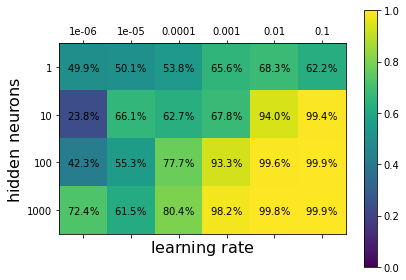

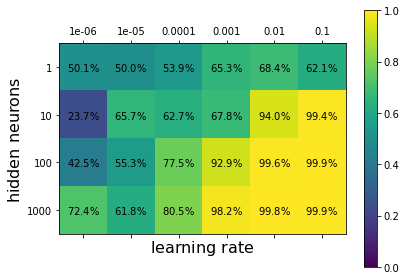

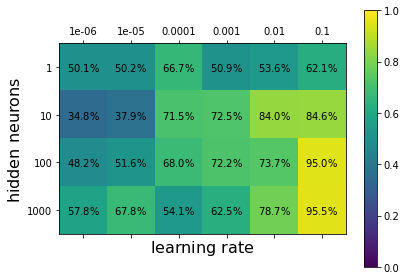

In [36]:
grid_search(False)